In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.interpolate import CubicSpline

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [2]:
DATA_DIR = Path.home()/Path('shared/climate-data')
co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()


In [3]:
def detrend(f):
    detrended_xarr = f.loc[:,["month", "c02"]]
    # BEGIN SOLUTION
    detrended_xarr["c02"] = detrended_xarr["c02"] - detrended_xarr["c02"].mean()
    # END SOLUTION
    return detrended_xarr

dy = data.groupby('year', group_keys=True)
c02anomaly = dy.apply(detrend)
# display(c02anomaly)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]
# monthly_anomaly

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


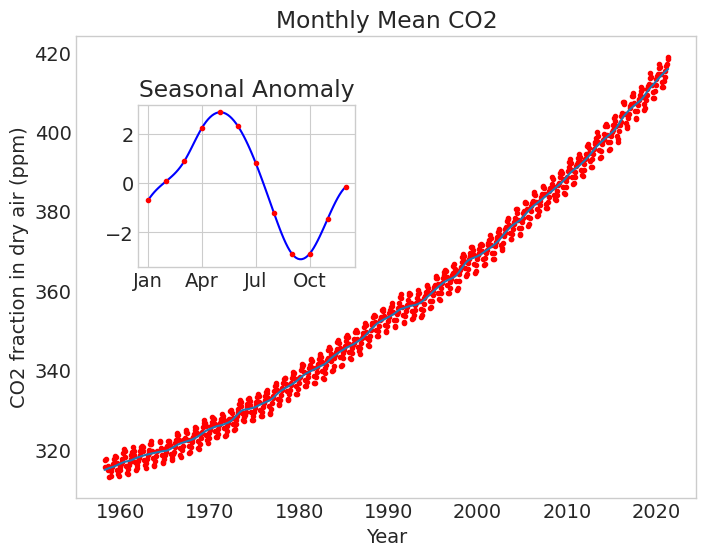

In [5]:
# calculate the anual cucle using groupby
annual = data.groupby(data.month).mean()

# calculate the anomaly
anomaly = annual - annual.mean()

# plot
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
x = np.linspace(1, 12, 100)
cs = CubicSpline(monthly_anomaly.index, monthly_anomaly.values)
axin1.plot(x, cs(x), "b")
axin1.plot(monthly_anomaly.c02, "r.")
axin1.set_xticks([1, 4, 7, 10])
axin1.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct'])
axin1.set_title("Seasonal Anomaly");